In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import time

## As imagens utilizadas nesse notebook estão disponível em : 
[Link para as imagens no github](https://github.com/pedrodsk/pdi/tree/master/imgs_pdi)
* Atenção a cédula abaixo para a posição das imagens, um nível anterior ao notebook e na pasta imgs_pdi

In [3]:
imgs_list = glob.glob('../imgs_pdi/*')

In [4]:
imgs_list.sort()

In [5]:
imgs_list

['../imgs_pdi/aorta.jpg',
 '../imgs_pdi/cubo_magico.jpg',
 '../imgs_pdi/fpb.png',
 '../imgs_pdi/hsv_python.png',
 '../imgs_pdi/joelho.jpg',
 '../imgs_pdi/leao.jpeg',
 '../imgs_pdi/montanha.jpg',
 '../imgs_pdi/paisagem.jpg',
 '../imgs_pdi/pedestres02.jpg',
 '../imgs_pdi/pelagem.jpg',
 '../imgs_pdi/pre-historia01.jpeg',
 '../imgs_pdi/pre-historia02.jpeg',
 '../imgs_pdi/psicopata.jpg',
 '../imgs_pdi/rainbow-fruits.jpg']

* Selecionar a imagem para todas as questões de acordo o index da lista acima

In [6]:
img_path = imgs_list[4]

(311, 553, 3)

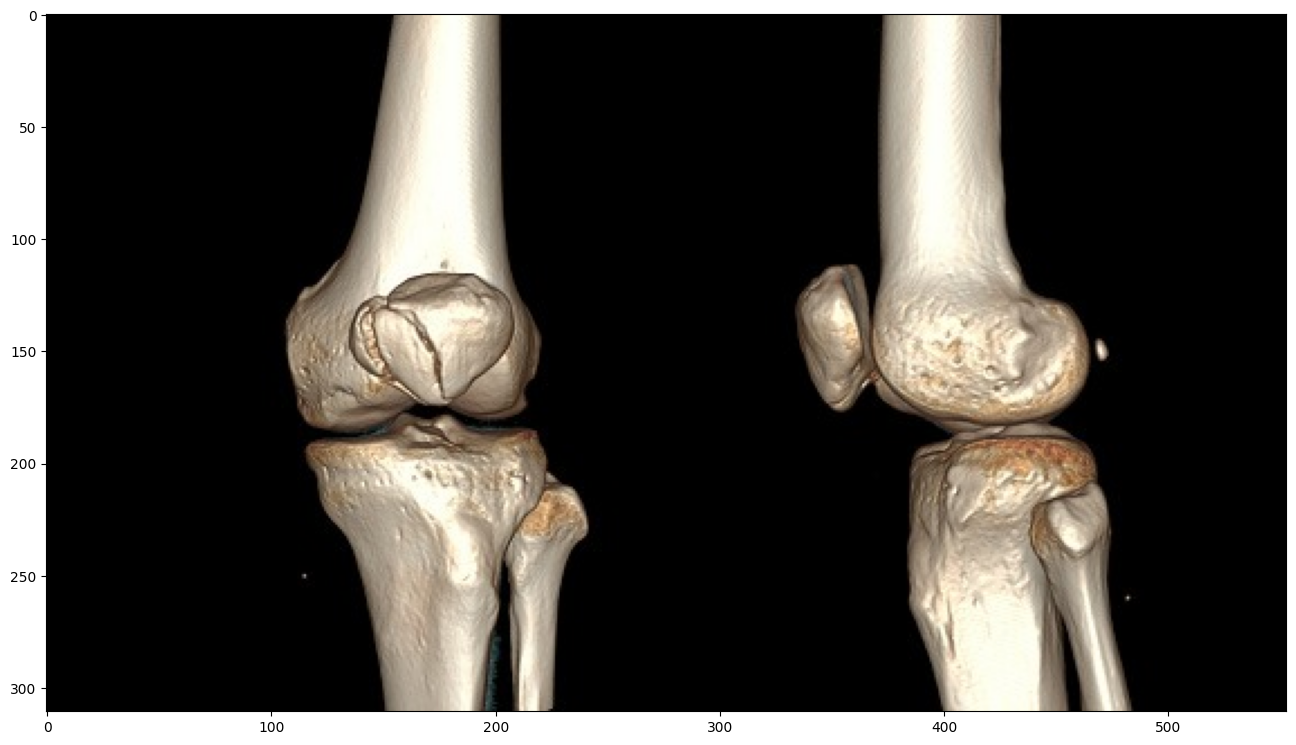

In [7]:
fig = plt.figure(figsize=(16,12))
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb)
img_rgb.shape

(array([366589.,   4288.,   7752.,  11245.,  16484.,  20872.,  24273.,
         19441.,  15508.,  29497.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

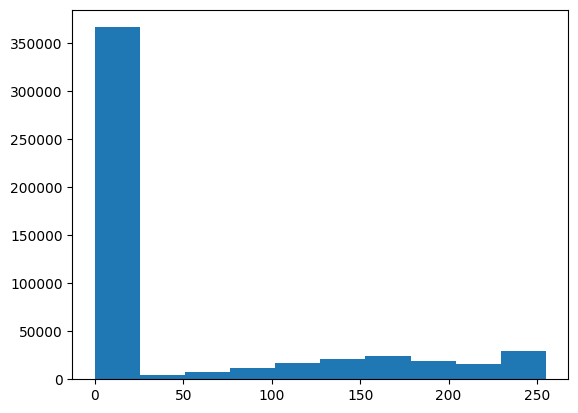

In [8]:
plt.hist(img_rgb.ravel())

In [9]:
def kmeans(img, k, itera, epsilon):
    try:
        _, _, channels = img.shape
        pixel_values = img.reshape((-1, channels))
    except:
        pixel_values = img.reshape((-1, 1))
        
    pixel_values = np.float32(pixel_values)
    print(f'Input: {pixel_values.shape}')
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, itera, epsilon)

    start = time.time()
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    end = time.time()
    print(f'Tempo de execução do algoritmo: {round(end-start,2)} segundos')

    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img.shape)

    return segmented_image, centers

In [24]:
image, centers = kmeans(img_rgb, 2, 100, 0)

Input: (171983, 3)
Tempo de execução do algoritmo: 0.18 segundos


In [25]:
centers

array([[  3,   3,   2],
       [194, 181, 161]], dtype=uint8)

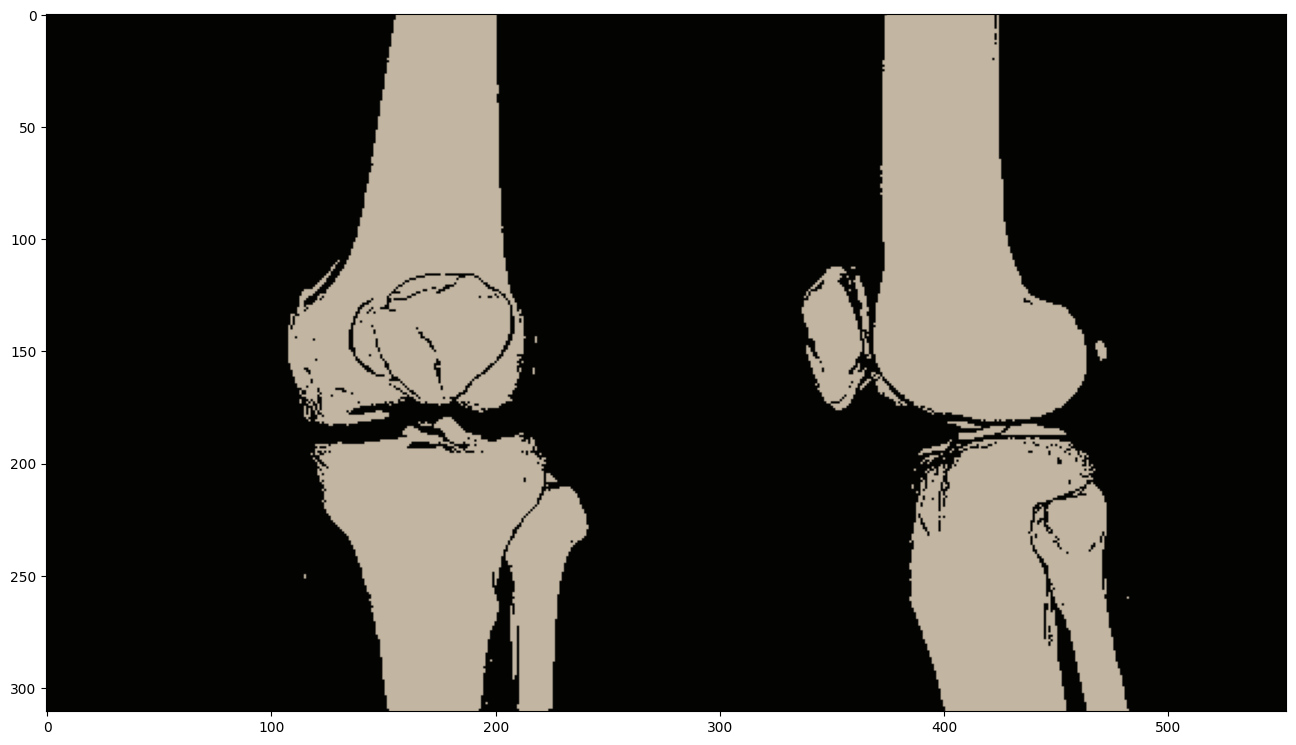

In [26]:
fig = plt.figure(figsize=(16,12))
plt.imshow(image)
plt.show()

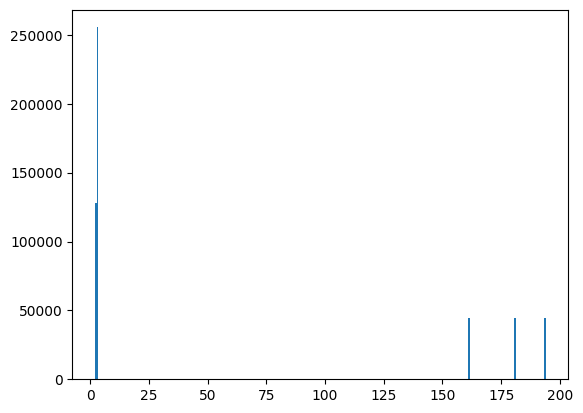

In [27]:
plt.hist(image.ravel(), bins=255)
plt.show()

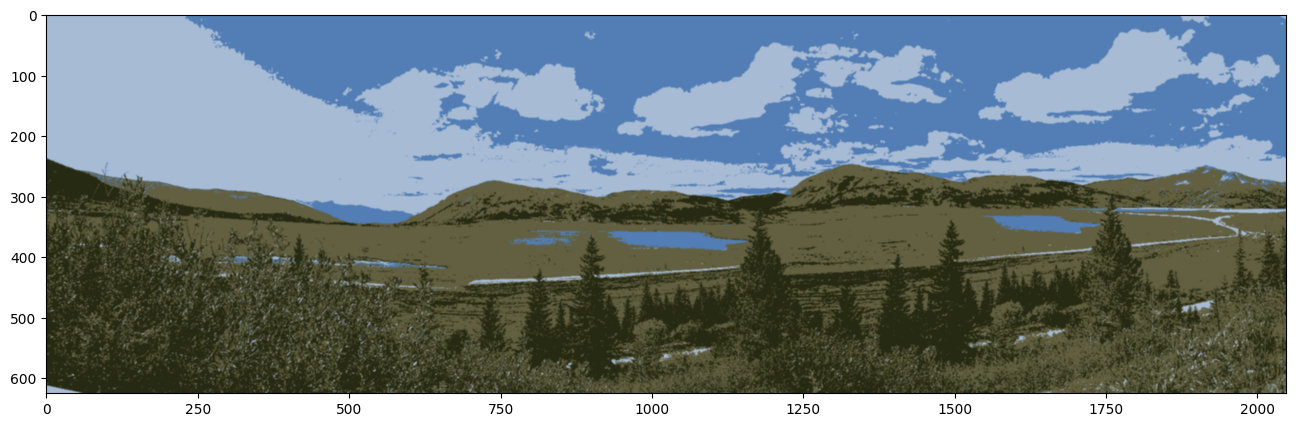

In [83]:
kernel = np.ones((3,3),np.float32)/9
dst_bgr = cv2.filter2D(image,-1,kernel)

fig = plt.figure(figsize=(16,12))
plt.imshow(dst_bgr)

In [84]:
dst_gray = cv2.cvtColor(dst_bgr, cv2.COLOR_RGB2GRAY)

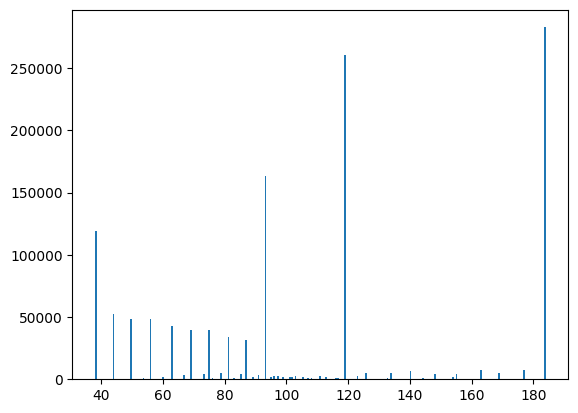

In [85]:
plt.hist(dst_gray.ravel(), bins=255)
plt.show()

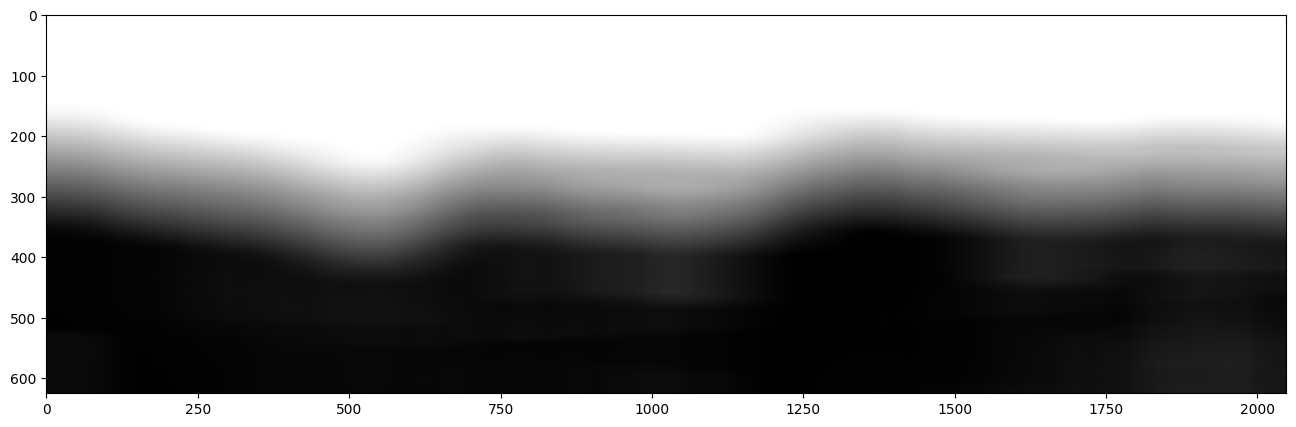

In [136]:
ret,seg = cv2.threshold(dst_gray,100,255,cv2.THRESH_BINARY)
seg = cv2.filter2D(seg,-1,kernel)
fig = plt.figure(figsize=(16,12))
seg = cv2.blur(seg,(200,200))
plt.imshow(seg, cmap='gray')

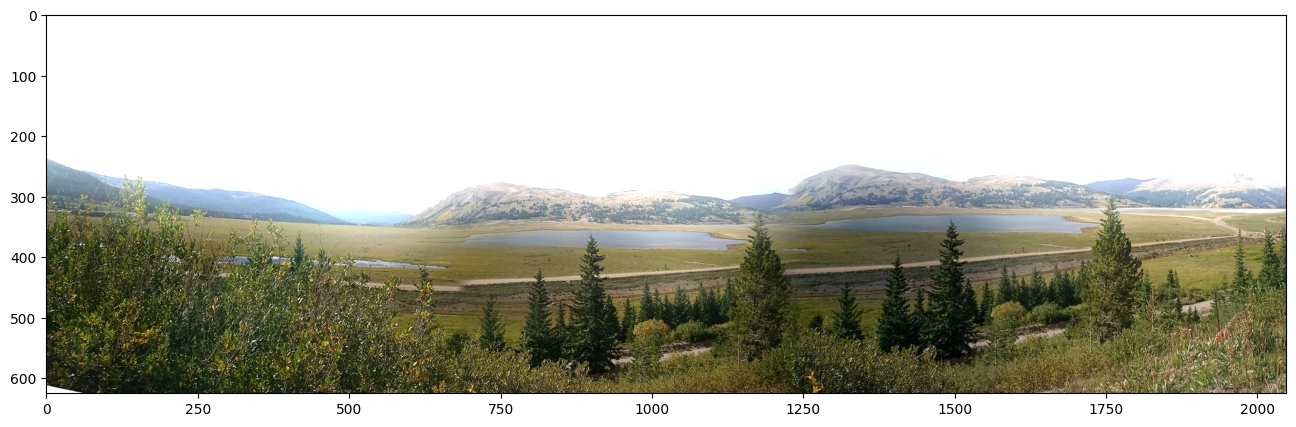

In [137]:
seg = cv2.cvtColor(seg, cv2.COLOR_GRAY2BGR)
img_final = cv2.add(img_rgb,seg)
fig = plt.figure(figsize=(16,12))
plt.imshow(img_final)

In [20]:
img_final.size[0]

TypeError: 'int' object is not subscriptable

In [ ]:
ret,seg = cv2.threshold(dst,200,255,cv2.THRESH_BINARY)

In [ ]:
img_final = cv2.add(img_rgb, seg)

In [ ]:
fig = plt.figure(figsize=(16,12))
plt.imshow(img_final)

In [ ]:
image, centers = kmeans(img_gray, 5, 100, 0.01)

In [ ]:
fig = plt.figure(figsize=(16,12))
plt.imshow(image, cmap='gray')
plt.show()

# Filtro passa-baixas

![FPB](../imgs_pdi/fpb.png "Filtro passa-baixas")

In [ ]:
kernel = np.ones((8,8),np.float32)/25
dst = cv2.filter2D(img_gray,-1,kernel)

In [ ]:
image, centers = kmeans(dst, 20, 200, 0.2)
fig = plt.figure(figsize=(16,12))
plt.imshow(image, cmap='gray')

In [ ]:
plt.hist(image.ravel(), bins=255)
plt.show()

In [ ]:
ret,seg = cv2.threshold(dst,180,255,cv2.THRESH_BINARY_INV)
dst =cv2.blur(seg,(2,2))

In [ ]:
fig = plt.figure(figsize=(16,12))
plt.imshow(seg, cmap='gray')

In [ ]:
seg2 = cv2.add(img_gray, dst)
fig = plt.figure(figsize=(16,12))
plt.imshow(seg2, cmap='gray')